 **COLLEGE EVENT FEEDBACK ANALYSIS**
  

**Dataset Overview**

This dataset contains student feedback collected from an autonomous college. The survey consists of 20 standardized questions assessing faculty performance and student experience. Each question is rated on a 1–5 scale, where 1 is the lowest and 5 is the highest. Data is grouped by course and department to evaluate trends in student satisfaction.

In [3]:
# Mount Google Drive to access files stored in the user's Google Drive account.
# This is required to load datasets or save outputs directly to Drive.

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Importing necessary libraries for data manipulation, visualization, and NLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import WordCloud
from textblob import TextBlob


In [5]:
# 📄 Loading the student feedback dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Student_Satisfaction_Survey.csv', encoding='ISO-8859-1')

# 🕵️‍♂️ Preview the data
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


## **Exploratory Data Analysis**

### **Initial Inspection**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [7]:
df.describe()

,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000


In [8]:
df.isnull().sum()

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


### **Data Cleaning**

In [9]:
# Spliting the "Average/ Percentage" column into two columns
df[['Average Score', 'Percentage']] = df['Average/ Percentage'].str.split(' / ', expand=True)

# Converting the new columns to numeric types
df['Average Score'] = pd.to_numeric(df['Average Score'], errors='coerce')
df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')


In [10]:
df[['Average/ Percentage', 'Average Score', 'Percentage']].head()

,Average/ Percentage,Average Score,Percentage
0,3.00 / 60.00,3.0,60.0
1,5.00 / 100.00,5.0,100.0
2,5.00 / 100.00,5.0,100.0
3,3.00 / 60.00,3.0,60.0
4,4.00 / 80.00,4.0,80.0


In [11]:
# Cleaning  all object (string) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.replace('\s+', ' ', regex=True)
    df[col] = df[col].str.replace(r'[^\x00-\x7F]+', '', regex=True)  # removes irregular/unicode characters that may affect processing



In [12]:
df.sample()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Average Score,Percentage
3,4,1,12,The teachers approach to teaching can best be ...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0


In [13]:
# Standardize column names: strip whitespace, lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sn                    580 non-null    int64  
 1   total_feedback_given  580 non-null    int64  
 2   total_configured      580 non-null    int64  
 3   questions             580 non-null    object 
 4   weightage_1           580 non-null    int64  
 5   weightage_2           580 non-null    int64  
 6   weightage_3           580 non-null    int64  
 7   weightage_4           580 non-null    int64  
 8   weightage_5           580 non-null    int64  
 9   average/_percentage   580 non-null    object 
 10  course_name           580 non-null    object 
 11  basic_course          580 non-null    object 
 12  average_score         580 non-null    float64
 13  percentage            580 non-null    float64
dtypes: float64(2), int64(8), object(4)
memory usage: 63.6+ KB


To ensure consistency and ease of use in analysis, I standardized the column names by converting them to lowercase, removing leading/trailing whitespaces, and replacing spaces with underscores.

In [15]:
# dropping the average/_percentage column
df.drop(columns='average/_percentage', inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sn                    580 non-null    int64  
 1   total_feedback_given  580 non-null    int64  
 2   total_configured      580 non-null    int64  
 3   questions             580 non-null    object 
 4   weightage_1           580 non-null    int64  
 5   weightage_2           580 non-null    int64  
 6   weightage_3           580 non-null    int64  
 7   weightage_4           580 non-null    int64  
 8   weightage_5           580 non-null    int64  
 9   course_name           580 non-null    object 
 10  basic_course          580 non-null    object 
 11  average_score         580 non-null    float64
 12  percentage            580 non-null    float64
dtypes: float64(2), int64(8), object(3)
memory usage: 59.0+ KB


In [17]:
# checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [18]:
# Randomly preview 10 questions to inspect text quality and structure
df['questions'].sample(10)


,questions
198,What percentage of teachers use ICT tools such...
3,The teachers approach to teaching can best be ...
149,Teachers inform you about your expected compet...
99,The overall quality of the teaching-learning p...
522,How well were the teachers able to communicate?
113,Teachers are able to identify your weaknesses ...
507,The teaching and mentoring process in your ins...
144,Fairness of the internal evaluation process by...
57,Efforts are made by the institute/ teachers to...
183,The teachers approach to teaching can best be ...


### **Feature Engineering**

In [19]:
# Deriving a composite satisfaction score by calculating the weighted sum of ratings (1–5 scale)
df['Rating'] = (
    df['weightage_1'] * 1 +
    df['weightage_2'] * 2 +
    df['weightage_3'] * 3 +
    df['weightage_4'] * 4 +
    df['weightage_5'] * 5
)

# Normalizing the total rating to a 0–100 scale to facilitate comparison across questions and courses
df['Rating_Percentage'] = (df['Rating'] / 5) * 100


Here, I calculated a total rating score for each question based on how many students gave each type of feedback (from 1 to 5).
Then, I converted that score into a percentage to make it easier to interpret and compare across questions or courses.


### **Descriptive Analytics**

####  1. Average Rating Per Question


In [20]:
avg_rating_per_question = df.groupby('questions')['Rating'].mean().sort_values(ascending=False)
avg_rating_per_question.head(10)  # Top 10 highest rated questions


,Rating
questions,
How well were the teachers able to communicate?,59.758621
Fairness of the internal evaluation process by the teachers.,59.241379
"Teachers inform you about your expected competencies, course outcomes and program outcomes.",57.551724
The teachers illustrate the concepts through examples and applications.,57.241379
How much of the syllabus was covered in the class?,57.206897
Was your performance in assignments discussed with you?,56.793103
Teachers encourage you to participate in extracurricular activities.,56.655172
The overall quality of the teaching-learning process in your institute is very good.,56.551724
How well did the teachers prepare for the classes?,56.344828


I calculated the average score each question received. This reveals which feedback items students rated most positively, helping us pinpoint strengths in teaching quality or mentorship.


The question **"How well were the teachers able to communicate?"** received the highest average score of **59.76%**, indicating that students felt the most positively about teacher communication.
On the other hand, questions around **soft skills and employability** were rated relatively lower (e.g., 55.93%), suggesting areas for targeted improvement.




#### 2. Highest and Lowest Rated Questions

In [21]:
# Top 5 most positively rated questions
print("🔼 Top Rated Questions:")
print(avg_rating_per_question.head(5))

# Bottom 5 least rated questions
print("\n🔽 Lowest Rated Questions:")
print(avg_rating_per_question.tail(5))


🔼 Top Rated Questions:
questions
How well were the teachers able to communicate?                                                59.758621
Fairness of the internal evaluation process by the teachers.                                   59.241379
Teachers inform you about your expected competencies, course outcomes and program outcomes.    57.551724
The teachers illustrate the concepts through examples and applications.                        57.241379
How much of the syllabus was covered in the class?                                             57.206897
Name: Rating, dtype: float64

🔽 Lowest Rated Questions:
questions
The institute takes an active interest in promoting internships, student exchange, field visit opportunities for students.    54.689655
Teachers are able to identify your weaknesses and help you to overcome them.                                                  54.206897
The teachers approach to teaching can best be described as                                              

This highlights the **best- and worst-performing** feedback areas. It helps identify areas of excellence and where improvement is most needed.



**Top Rated Feedback Areas:**

Students highly value teacher communication and the fairness of internal evaluations, indicating strong clarity and transparency in academic processes.

**Areas for Improvement:**

The lowest-rated question concerns ICT tool usage in teaching (47.5%), which suggests a potential technology adoption gap.

Others relate to internship support, mentoring for personal growth, and identifying student weaknesses — key areas that can be strengthened to enhance overall educational effectiveness.



#### 3. Average Rating by Course



In [22]:
# Comparing average ratings across courses
course_rating = df.groupby('course_name')['Rating'].mean().sort_values(ascending=False)
course_rating

# Visual enhancement for tables
course_rating_df = course_rating.reset_index()
course_rating_df.style.background_gradient(cmap='Blues')

,course_name,Rating
0,FY BCOM (ACCOUNTING & FINANCE),297.450000
1,S.Y.B.A.F,190.100000
2,TYBCOM,145.750000
3,SYBCOM,136.950000
4,FYBMS,105.800000
5,SY COMPUTER SCIENCE,90.550000
6,FY BCOM (BANKING & INSURANCE),87.000000
7,TYBA,70.050000
8,MSC ORGANIC CHEMISTRY - 3,67.550000
9,MSC MICROBIOLOGY - 3,51.700000


This reveals how each **course was rated overall**. It helps program managers understand which courses have the strongest or weakest student satisfaction.

**Top Rated Courses:**
FY BCOM (Accounting & Finance) and S.Y.B.A.F received the highest average ratings, suggesting strong student satisfaction in the BCOM-related programs.

**Lowest Rated Courses:**
Courses like MSC Data Science - 1, MSC Physics - 3, and MSC Information Technology - 1 scored the lowest, potentially indicating student dissatisfaction, challenges in delivery, or expectations not being met in those programs.

#### 4. Distribution of All Ratings

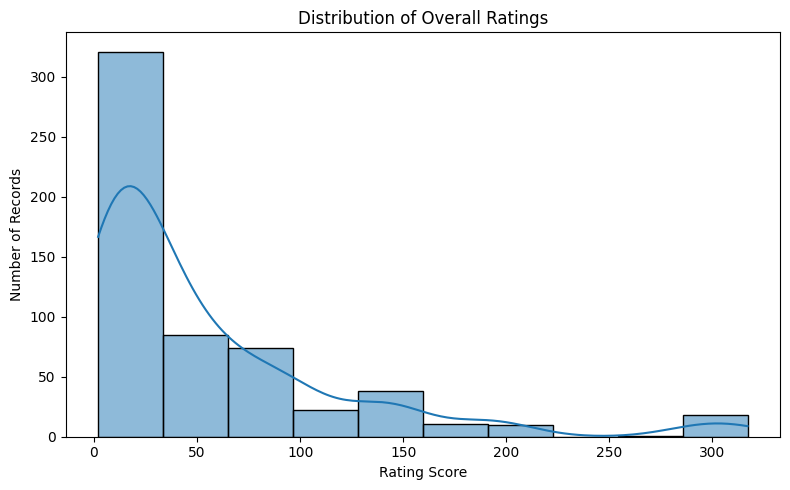

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.savefig('rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

This chart shows the frequency of different rating scores. We can quickly assess whether students are mostly satisfied or if ratings are skewed toward one end.

**Interpretation:**

The distribution of overall ratings reveals that the **majority of students (around 300 responses)** gave feedback scores in the **lower range between 0 and 35**, suggesting widespread dissatisfaction or low engagement in certain areas.
In contrast, **very few responses (fewer than 50)** fell within the **higher range of 151 to 230**, indicating that **exceptionally high ratings were rare**.
This highlights a potential concern regarding student satisfaction levels and suggests that further investigation into the causes of lower ratings may be necessary.

#### 5. Bar Chart of Average Rating by Course

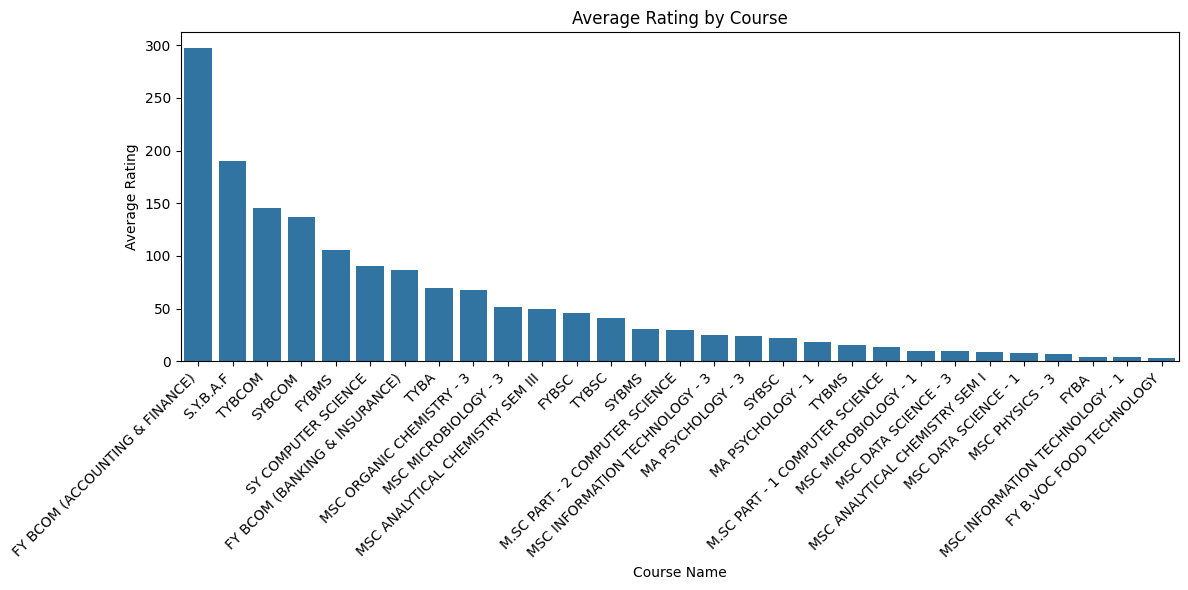

In [24]:
# Bar plot comparing average ratings across courses
plt.figure(figsize=(12, 6))
sns.barplot(x=course_rating.index, y=course_rating.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Course')
plt.ylabel('Average Rating')
plt.xlabel('Course Name')
plt.tight_layout()
plt.savefig('rating_by_course.png', dpi=300, bbox_inches='tight')
plt.show()


This bar chart makes it easy to visually **compare satisfaction levels across courses**, helping us spot which programs are excelling or underperforming.



####  6. Pie Chart of Weightage Distribution



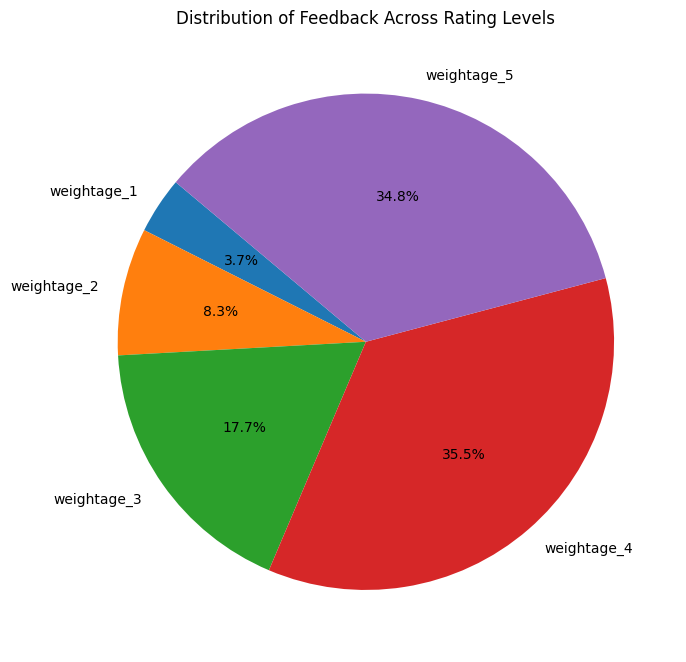

In [25]:
# Distribution of feedback weights (1–5)
weightage_totals = df[['weightage_1', 'weightage_2', 'weightage_3', 'weightage_4', 'weightage_5']].sum()
labels = weightage_totals.index
sizes = weightage_totals.values

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Feedback Across Rating Levels')
plt.tight_layout()
plt.savefig('feedback_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


This pie chart shows **how student feedback is distributed across all rating levels (1 to 5)**. It provides a high-level view of overall sentiment.

**Interpretation:**

The pie chart shows how students distributed their feedback across the 5 possible rating levels:

**Weightage 4 (35.5%) and Weightage 5 (34.8%) received the highest proportions of feedback, making up over 70% of all responses**.

**This suggests that most students gave high ratings, reflecting positive satisfaction with the teaching and learning experience**.

**Lower ratings like Weightage 1 (3.7%) and Weightage 2 (8.3%) were far less common, indicating relatively few negative responses**.

This distribution highlights an overall trend of **favorable student perception**.

**                                       **

#### **Reconciling High Individual Ratings with Low Overall Scores: A Deeper Look into Student Feedback**

While individual question ratings were predominantly positive — with over 70% of all responses being either 4 or 5 — the **overall rating distribution** shows that a significant number of students had **low total scores** (0–35), suggesting either:

* **Partial completion of the feedback form**

* **Mixed or inconsistent perceptions across different areas**

* **Or a small but impactful portion of low-rated questions dragging down their total score**

This dual insight highlights a nuanced reality: **students are not universally dissatisfied**, but their overall experience may have been **fragmented or inconsistent**. This suggests the need for **targeted improvements** rather than broad systemic issues.

**                    **
## **Explanation for Not Performing Sentiment Analysis**
**Note**: Sentiment analysis was not conducted for this project because the dataset consists solely of structured numerical responses (ratings) with no open-ended text feedback.

Sentiment analysis is typically applied to qualitative data such as written comments or opinions, where it helps extract emotional tone (positive, neutral, or negative). Since this dataset lacks such free-text fields, traditional sentiment analysis methods like VADER or TextBlob would not provide meaningful insights.



## **Word Cloud for Questions**

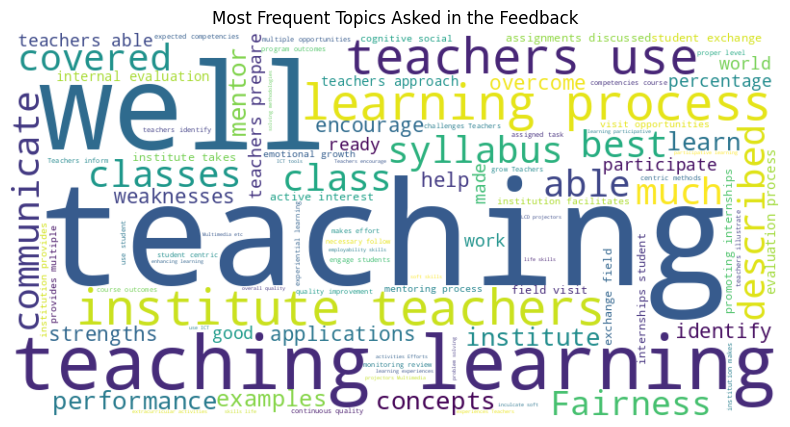

In [26]:
# Joining all the survey questions into a single text block
text = " ".join(df['questions'].dropna())

# Generating and displaying word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Topics Asked in the Feedback')
plt.savefig('word_cloud.png', dpi=300, bbox_inches='tight')
plt.show()


A **word cloud** is a visual representation that shows which words appear most frequently in the dataset. Larger words indicate more frequent mentions.
Since we don't have open-ended student comments, I instead visualized the **survey questions** themselves to reveal what the institution is most focused on — such as teaching quality, evaluation methods, or extracurricular activities.

**Interpretation of Word Cloud Output:**

The most visible words — such as **"teaching,"** **"learning,"** **"fairness,"** **"communicate,"** and **"class"** — suggest that the feedback primarily revolves around:

* **Teaching quality and delivery**

* **Fairness in academic evaluation**

* **Classroom learning processes**

* **Communication between teachers and students**

* **Coverage of syllabus and institutional structure**

This indicates a strong institutional focus on **academic delivery, fairness, and communication**, which aligns with the strengths identified in the previous phases. However, the lack of words related to **technology, practical exposure**, or **student support** may reinforce the areas that were rated lower — such as **ICT use, personalized mentoring**, and **internship opportunities**.



**                    **
## **Insights & Recommendations**

📊 **Key Insights:**

**Top 3 Most Liked Areas** (based on highest-rated questions):

✅"How well were the teachers able to communicate?"

✅ "Fairness of the internal evaluation process by the teachers."

✅ "Teachers inform you about your expected competencies, course outcomes and program outcomes."

These reflect positively on **teacher communication, fairness, and clarity of expectations**.

**Lowest Rated Areas:**

⚠️ "Use of ICT tools (projectors, multimedia, etc.) in teaching"

⚠️ "Teachers identifying and helping with student weaknesses"

⚠️ "Efforts toward student internships, field visits, or exchange opportunities"

These point to gaps in **technology integration, personalized support, and practical exposure**.

**                    **


💡 **Recommendations:**

1. **Boost Use of Educational Technology**

Encourage teachers to integrate tools like projectors, online quizzes, or LMS platforms to make learning more engaging.

2. **Enhance Mentorship Support**

Introduce office hours or peer support programs to help students work on their weaknesses.

3. **Promote Industry Linkages**

Facilitate internships, industrial visits, and collaborations with companies to prepare students for the job market.

4. **Interactive Teaching Methods**

Adopt flipped classrooms or group discussions to increase engagement.

5. **Improve Transparency in Evaluation**

Train teachers to provide feedback and discuss assignments openly with students.



**              **
### **Exporting the Cleaned Data**

In [27]:
# Saving the cleaned and analyzed dataset for future use or dashboard building
df.to_csv('cleaned_student_feedback.csv', index=False)


This step saves the cleaned and transformed data to a **CSV file**, so it can be used later — for dashboards (e.g., Power BI), reports, or further analysis.



#### **Creating the Requirement file**

In [28]:
!pip freeze > requirements.txt

A **requirements file** is simply a list of all the Python tools and libraries your project needs to run.

It’s needed so:

* Others can set up this project easily without guessing what I used.

* The project runs the same way on any computer, now or in the future.